In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

#really big dataset, it was the only way I could import it
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Data/archive.zip', 'r')
zip_ref.extractall('/tmp/archive')
zip_ref.close()

In [ ]:
import numpy as np
import os
import cv2
import skimage
from skimage.transform import resize

folders_path = '/tmp/archive/archive/'

X_train = np.empty((3846, 100, 100, 3), dtype=np.float32)
y_train = np.empty((3846,), dtype=int)
count = 0
#this is the structure of files in the unzipped dataset, thanks to segregation it was possible to import image and label at the same time
for folderName in os.listdir(folders_path):
  if folderName in ['burj_khalifa']:
      label = 0
  elif folderName in ['chichen_itza']:
      label = 1
  elif folderName in ['christ_the_reedemer']:
      label = 2
  elif folderName in ['eiffel_tower']:
      label = 3
  elif folderName in ['great_wall_of_china']:
      label = 4
  elif folderName in ['machu_pichu']:
      label = 5
  elif folderName in ['pyramids_of_giza']:
      label = 6
  elif folderName in ['roman_colosseum']:
      label = 7
  elif folderName in ['statue_of_liberty']:
      label = 8
  elif folderName in ['stonehenge']:
      label = 9
  elif folderName in ['taj_mahal']:
      label = 10
  elif folderName in ['venezuela_angel_falls']:
      label = 11

  for image_filename in os.listdir(folders_path + folderName):
    img_file = cv2.imread(folders_path + folderName + '/' + image_filename)
    if img_file is not None:
        img_file = skimage.transform.resize(img_file, (100, 100, 3))
        img_arr = np.asarray(img_file).reshape((-1, 100, 100, 3))

        X_train[count] = img_arr
        y_train[count] = label
        count += 1

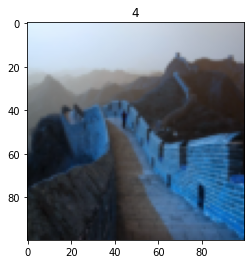

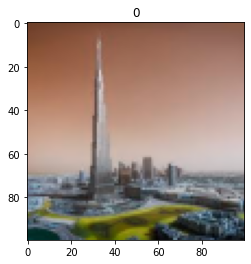

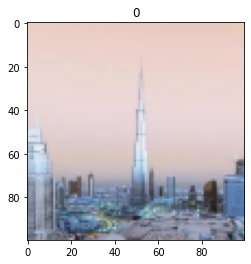

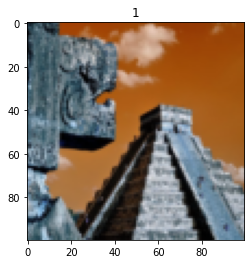

In [ ]:
import matplotlib.pyplot as plt

#some images
plt.imshow(X_train[3460])
plt.title(label=y_train[3460])
plt.show()
plt.imshow(X_train[50])
plt.title(label=y_train[50])
plt.show()
plt.imshow(X_train[1])
plt.title(label=y_train[1])
plt.show()
plt.imshow(X_train[2000])
plt.title(label=y_train[2000])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4,random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,12)
y_cat_test = to_categorical(y_test,12)

In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, LeakyReLU

In [ ]:
# model = Sequential()

# model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(16, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))

# model.add(Dense(29, activation='softmax'))

# model.summary()

In [ ]:
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(100, 100, 3), strides=(3,3)))
model.add(BatchNormalization(renorm=True))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(renorm=True))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(renorm=True))
model.add(Activation('LeakyReLU'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='LeakyReLU'))

model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       448       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        1

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_cat_train, epochs=300, batch_size = 64, validation_data=(X_test, y_cat_test))

Epoch 1/300
37/37 [==============================] - 7s 160ms/step - loss: 2.3911 - accuracy: 0.1656 - val_loss: 2.2123 - val_accuracy: 0.2625
Epoch 2/300
37/37 [==============================] - 6s 153ms/step - loss: 2.0895 - accuracy: 0.2909 - val_loss: 1.9287 - val_accuracy: 0.3710
Epoch 3/300
37/37 [==============================] - 6s 154ms/step - loss: 2.0872 - accuracy: 0.3186 - val_loss: 1.9777 - val_accuracy: 0.3496
Epoch 4/300
37/37 [==============================] - 6s 153ms/step - loss: 2.1089 - accuracy: 0.3307 - val_loss: 1.9918 - val_accuracy: 0.3697
Epoch 5/300
37/37 [==============================] - 6s 153ms/step - loss: 1.8073 - accuracy: 0.3914 - val_loss: 1.6925 - val_accuracy: 0.4639
Epoch 6/300
37/37 [==============================] - 6s 154ms/step - loss: 1.7722 - accuracy: 0.4235 - val_loss: 1.7773 - val_accuracy: 0.4094
Epoch 7/300
37/37 [==============================] - 6s 154ms/step - loss: 1.8054 - accuracy: 0.3901 - val_loss: 1.9453 - val_accuracy: 0.3418

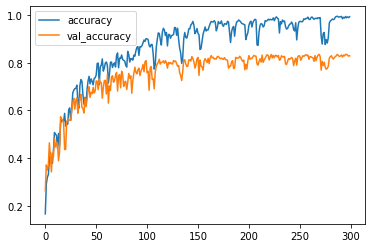

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_cat_test)
print("Accuracy", acc)

49/49 [==============================] - 1s 18ms/step - loss: 1.0186 - accuracy: 0.8291
Accuracy 0.829109787940979


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
probs = model.predict(X_test)
y_pred = np.argmax(probs,axis=1)

49/49 [==============================] - 1s 19ms/step


1/1 [==============================] - 0s 23ms/step
[[2.2232960e-10 3.6074781e-14 5.9942906e-08 1.3982978e-09 6.2947141e-11
  6.2127007e-14 8.1331952e-13 8.2021945e-09 9.9999988e-01 1.8299910e-11
  4.2742922e-13 2.7826240e-17]]
Predicted:[8]


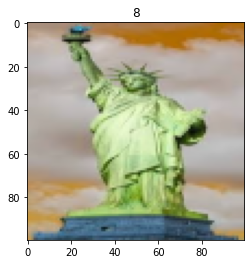

In [ ]:
image = X_test[300]
image = np.expand_dims(image,axis=0)
preds = model.predict(image)
print(preds)
y_pred_i = np.argmax(preds,axis=1)
print(f'Predicted:{y_pred_i}')
plt.imshow(X_test[300])
plt.title(label=y_test[300])
plt.show()

1/1 [==============================] - 0s 25ms/step
[[2.0788575e-06 1.4813802e-04 1.1494680e-05 9.3247052e-03 3.4164265e-02
  9.5058304e-01 1.5161370e-04 4.4615768e-05 5.9880545e-06 2.1106663e-08
  2.3520053e-05 5.5406233e-03]]
Predicted:[5]


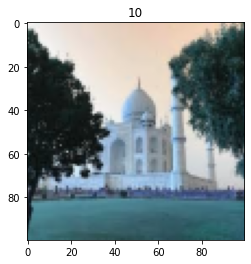

In [ ]:
image = X_test[52]
image = np.expand_dims(image,axis=0)
preds = model.predict(image)
print(preds)
y_pred_i = np.argmax(preds,axis=1)
print(f'Predicted:{y_pred_i}')
plt.imshow(X_test[52])
plt.title(label=y_test[52])
plt.show()

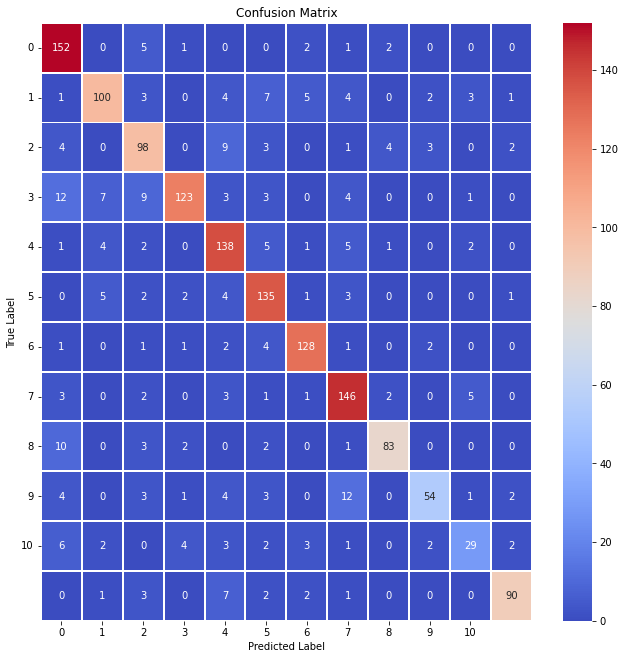

In [ ]:
import seaborn as sns
from sklearn import metrics

LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS[0:num_classes],
                yticklabels=LABELS[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

show_confusion_matrix(y_test, y_pred, 11)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,
                            y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       163
           1       0.84      0.77      0.80       130
           2       0.75      0.79      0.77       124
           3       0.92      0.76      0.83       162
           4       0.78      0.87      0.82       159
           5       0.81      0.88      0.84       153
           6       0.90      0.91      0.90       140
           7       0.81      0.90      0.85       163
           8       0.90      0.82      0.86       101
           9       0.86      0.64      0.73        84
          10       0.71      0.54      0.61        54
          11       0.92      0.85      0.88       106

    accuracy                           0.83      1539
   macro avg       0.83      0.81      0.81      1539
weighted avg       0.83      0.83      0.83      1539

